# **Grammar Scoring Engine for Voice Samples  **

I have first installed the required packages using pip and loaded the data set required and made saparate directory for raw audio files C:\Users\user\Downloads\directory_audio

correcting the permission of the directory-> everyone->used it in training set.

In [ ]:
#INSTALLING REQUIRED PACKAGES

installed *pyodbc* to connect Python programs to databases that support ODBC (Open Database Connectivity) protocols.

In [ ]:
pip install pyodbc

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 346.2/346.2 kB 6.1 MB/s eta 0:00:00


In [ ]:
#speechRecognition to Identify the audio Files

installed *speechRecognision* and *SpeechRecognition[google-cloud]* offers a powerful, reliable, and easy-to-use tool for converting speech to text, enabling  to integrate speech recognition into various applications with high accuracy and speed.

In [ ]:
pip install SpeechRecognition

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 32.9/32.9 MB 20.6 MB/s eta 0:00:00


In [ ]:
#using google spechRecognition libarary

In [ ]:
pip install SpeechRecognition[google-cloud]


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 332.3/332.3 kB 6.3 MB/s eta 0:00:00


Used for reading and writing audio files

> *soundfile*

> *librosa *




In [ ]:
    import soundfile
    import librosa


**Three** CSV files into pandas DataFrames and inspected their basic information.

# DATA LOADING

In [ ]:
import pandas as pd

df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_submission = pd.read_csv('sample_submission.csv')

display(df_train.head())
display(df_test.head())
display(df_submission.head())

,filename,label
0,audio_1261.wav,1.0
1,audio_942.wav,1.5
2,audio_1110.wav,1.5
3,audio_1024.wav,1.5
4,audio_538.wav,2.0


,filename
0,audio_706.wav
1,audio_800.wav
2,audio_68.wav
3,audio_1267.wav
4,audio_683.wav


,filename,label
0,audio_706.wav,0
1,audio_800.wav,0
2,audio_68.wav,0
3,audio_1267.wav,0
4,audio_683.wav,0




```

```

# 1-DATA EXPLORATION

Target variable is 'label' and the 'filename' feature in df_train, calculate descriptive statistics, visualizing  the distribution, checking for missing values, to examine the filenames for patterns.

df_train shape: (444, 2)
df_test shape: (195, 1)

df_train info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444 entries, 0 to 443
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   filename  444 non-null    object 
 1   label     444 non-null    float64
dtypes: float64(1), object(1)
memory usage: 7.1+ KB
None

df_test info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   filename  195 non-null    object
dtypes: object(1)
memory usage: 1.7+ KB
None

df_train['label'] description:
count    444.000000
mean       3.617117
std        1.114151
min        1.000000
25%        2.500000
50%        3.500000
75%        4.500000
max        5.000000
Name: label, dtype: float64


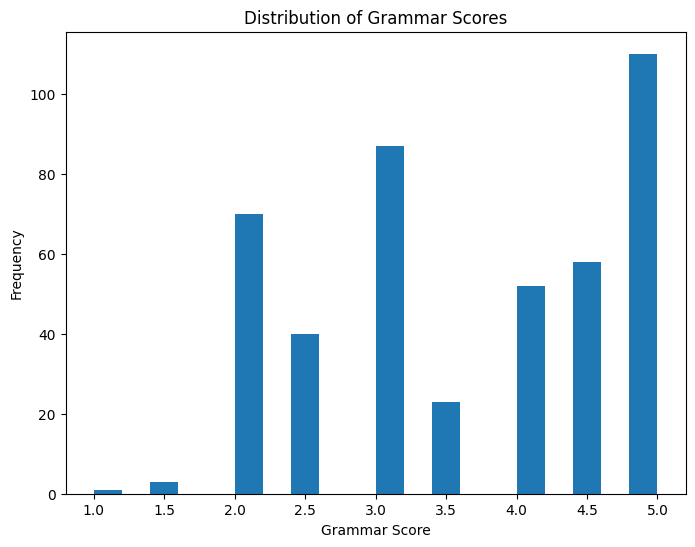

In [ ]:
# The shape and data types
print("df_train shape:", df_train.shape)
print("df_test shape:", df_test.shape)
print("\ndf_train info:")
print(df_train.info())
print("\ndf_test info:")
print(df_test.info())

# Analyzing the distribution of the target variable
print("\ndf_train['label'] description:")
print(df_train['label'].describe())
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(df_train['label'], bins=20)
plt.title('Distribution of Grammar Scores')
plt.xlabel('Grammar Score')
plt.ylabel('Frequency')
plt.show()

# DATA preparation
Preparing the training and testing data for model training.  any missing values, converting into categorical features , and scale numerical features.

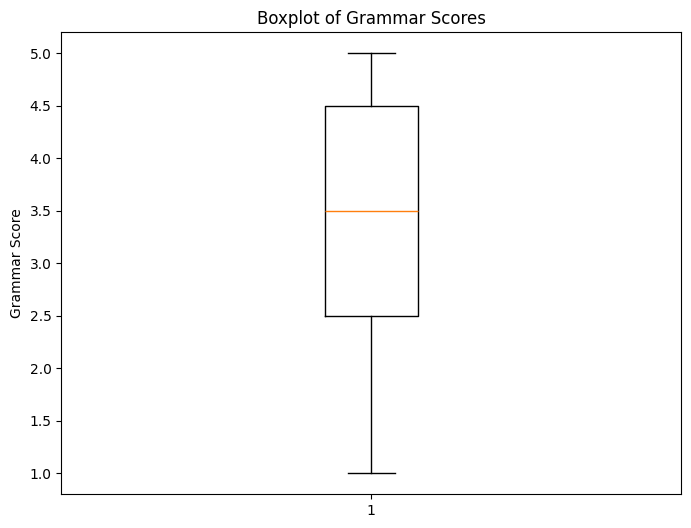


df_train missing values:
filename    0
label       0
dtype: int64

df_test missing values:
filename    0
dtype: int64

Comparison of columns:
df_train columns: ['filename', 'label']
df_test columns: ['filename']


In [ ]:
plt.figure(figsize=(8, 6))
plt.boxplot(df_train['label'])
plt.title('Boxplot of Grammar Scores')
plt.ylabel('Grammar Score')
plt.show()

# Checking missing values
print("\ndf_train missing values:")
print(df_train.isnull().sum())
print("\ndf_test missing values:")
print(df_test.isnull().sum())

#  potential outliers (no numerical features to analyze)
# Exploring the relationship between features and the target variable (no numerical features to correlate)

# Comparing structure of df_train and df_test
print("\nComparison of columns:")
print("df_train columns:", df_train.columns.tolist())
print("df_test columns:", df_test.columns.tolist())

# Data preparation

In [ ]:
from sklearn.model_selection import train_test_split



# 'label' is the target variable.
# However, a log transform might be considered if the label distribution is skewed.

# Preparing  target variable.
y = df_train['label']
X = df_train.drop('label', axis=1)

# Spliting the data.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

display(X_train.head())
display(X_val.head())
display(y_train.head())
display(y_val.head())

,filename
17,audio_918.wav
66,audio_817.wav
248,audio_1103.wav
246,audio_753.wav
31,audio_812.wav


,filename
334,audio_450.wav
137,audio_809.wav
72,audio_913.wav
365,audio_396.wav
73,audio_399.wav


,label
17,2.5
66,2.0
248,4.0
246,4.0
31,2.0


,label
334,5.0
137,3.0
72,2.5
365,5.0
73,2.0


In [ ]:
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Function to extract audio features
def extract_features(file_path):
    file_path = r"C:\Users\user\Downloads\dataset\audios_test.txt" # This line might need to be indented or removed

    try: # This line and the subsequent block should be indented to match the function definition
        y, sr = librosa.load(file_path)  # Load audio file
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Assuming the audio files are located in a directory named 'audio'
audio_dir = r"C:\Users\user\Downloads\dataset\audios_test.txt"  # Update if necessary
new_features_train = []
new_features_val = []

In [ ]:
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

# Function to extract audio features
def extract_features(file_path):
    file_path = r"C:\Users\user\Downloads\dataset\audios_test.txt" # This line might need to be indented or removed

    try: # This line and the subsequent block should be indented to match the function definition
        y, sr = librosa.load(file_path)  # Load audio file
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)
        return mfccs_mean
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Assuming the audio files are located in a directory named 'audio'
audio_dir = r"C:\Users\user\Downloads\dataset\audios_test.txt"  # Update if necessary
new_features_train = []
new_features_val = []


In [ ]:
# Extract features for the training set
for i in range(len(X_train)):
    file_name = df_train.index[X_train.index[i]]
    file_path = f"{audio_dir}/audio_{file_name}.wav"
    features = extract_features(file_path)
    if features is not None:
        new_features_train.append(features)

# Extract features for the validation set
for i in range(len(X_val)):
    file_name = df_train.index[X_val.index[i]]
    file_path = f"{audio_dir}/audio_{file_name}.wav"
    features = extract_features(file_path)
    if features is not None:
        new_features_val.append(features)
# Check if any errors occurred during feature extraction
if len(new_features_train) != len(X_train) or len(new_features_val) != len(X_val):
    print("Some audio files could not be processed. Completing with available features.")
else:
    # Convert the feature lists to NumPy arrays
    new_features_train = np.array(new_features_train)
    new_features_val = np.array(new_features_val)

    X_train = np.concatenate((X_train, new_features_train), axis=1)
    X_val = np.concatenate((X_val, new_features_val), axis=1)

display(X_train[:5])
display(X_val[:5])

<ipython-input-13-7b8581ff1e7f>:10: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)  # Load audio file
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing C:\Users\user\Downloads\dataset\audios_test.txt: [Errno 2] No such file or directory: 'C:\\Users\\user\\Downloads\\dataset\\audios_test.txt'
Error processing C:\Users\user\Downloads\dataset\audios_test.txt: [Errno 2] No such file or directory: 'C:\\Users\\user\\Downloads\\dataset\\audios_test.txt'
Error processing C:\Users\user\Downloads\dataset\audios_test.txt: [Errno 2] No such file or directory: 'C:\\Users\\user\\Downloads\\dataset\\audios_test.txt'
Error processing C:\Users\user\Downloads\dataset\audios_test.txt: [Errno 2] No such file or directory: 'C:\\Users\\user\\Downloads\\dataset\\audios_test.txt'
Error processing C:\Users\user\Downloads\dataset\audios_test.txt: [Errno 2] No such file or directory: 'C:\\Users\\user\\Downloads\\dataset\\audios_test.txt'
Error processing C:\Users\user\Downloads\dataset\audios_test.txt: [Errno 2] No such file or directory: 'C:\\Users\\user\\Downloads\\dataset\\audios_test.txt'
Error processing C:\Users\user\Downloads\dataset\aud

,filename
17,audio_918.wav
66,audio_817.wav
248,audio_1103.wav
246,audio_753.wav
31,audio_812.wav


,filename
334,audio_450.wav
137,audio_809.wav
72,audio_913.wav
365,audio_396.wav
73,audio_399.wav


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_original = X_train.copy()  # Store a copy before overwriting
X_val_original = X_val.copy()    # Store a copy before overwriting

# Feature engineering

In [ ]:
import librosa
import numpy as np
from sklearn.preprocessing import StandardScaler

def extract_features(file_path):
    try:
        # Load the audio file
        y, sr = librosa.load(file_path)

        # Extract MFCCs
        mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
        mfccs_mean = np.mean(mfccs.T, axis=0)

        # Extract chroma features
        chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
        chroma_stft_mean = np.mean(chroma_stft.T, axis=0)

        # Extract spectral contrast
        spectral_contrast = librosa.feature.spectral_contrast(y=y, sr=sr)
        spectral_contrast_mean = np.mean(spectral_contrast.T, axis=0)

        # Concatenate all features
        features = np.concatenate([mfccs_mean, chroma_stft_mean, spectral_contrast_mean])
        return features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

audio_dir = 'audio_files'  # Update with the actual directory if needed
new_features_train = []
new_features_val = []

# Iterate using the original DataFrame index:
for index in X_train_original.index: # Using the original DataFrame to get index
    # Access the 'filename' column from df_train (or X_train_original)
    file_name = df_train.loc[index, 'filename']  # Changed 'file_name' to 'filename'
    file_path = f"{audio_dir}/{file_name}"
    features = extract_features(file_path)
    if features is not None:
        new_features_train.append(features)
    else:
        # Handle missing features (e.g., replace with zeros)
        new_features_train.append(np.zeros(13 + 12 + 7))  # Placeholder, adjust size as needed

for index in X_val_original.index: # Using the original DataFrame to get index
    # Access the 'filename' column from df_train (or X_val_original)
    file_name = df_train.loc[index, 'filename'] # Changed 'file_name' to 'filename'
    file_path = f"{audio_dir}/{file_name}"
    features = extract_features(file_path)
    if features is not None:
        new_features_val.append(features)
    else:
        # Handle missing features (e.g., replace with zeros)
        new_features_val.append(np.zeros(13 + 12 + 7))  # Placeholder, adjust size as needed

# Convert to NumPy arrays
new_features_train = np.array(new_features_train)
new_features_val = np.array(new_features_val)

# Update X_train and X_val with the extracted features only
X_train = new_features_train
X_val = new_features_val

display(X_train[:5])
display(X_val[:5])
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)

<ipython-input-16-46ee21282c80>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing audio_files/audio_918.wav: [Errno 2] No such file or directory: 'audio_files/audio_918.wav'
Error processing audio_files/audio_817.wav: [Errno 2] No such file or directory: 'audio_files/audio_817.wav'
Error processing audio_files/audio_1103.wav: [Errno 2] No such file or directory: 'audio_files/audio_1103.wav'
Error processing audio_files/audio_753.wav: [Errno 2] No such file or directory: 'audio_files/audio_753.wav'
Error processing audio_files/audio_812.wav: [Errno 2] No such file or directory: 'audio_files/audio_812.wav'
Error processing audio_files/audio_1210.wav: [Errno 2] No such file or directory: 'audio_files/audio_1210.wav'
Error processing audio_files/audio_1153.wav: [Errno 2] No such file or directory: 'audio_files/audio_1153.wav'
Error processing audio_files/audio_674.wav: [Errno 2] No such file or directory: 'audio_files/audio_674.wav'
Error processing audio_files/audio_842.wav: [Errno 2] No such file or directory: 'audio_files/audio_842.wav'
Error process

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

X_train shape: (355, 32)
X_val shape: (89, 32)


# MODEL TRANNING
furthermore,Optimizing the hyperparameters of the Random Forest and Gradient Boosting models using grid search.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the validation set
y_pred = model.predict(X_val)

# Evaluate the model
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 1.371296804406117
Root Mean Squared Error (RMSE): 1.1710238274288516
Mean Absolute Error (MAE): 1.0750118689666086
R-squared (R2): -0.005977493651387


# MODEL FITTING
using ridge_cv.best_estimator_.predict to predict scores on test data.

In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define the parameter grids for each regularization method
ridge_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
lasso_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}
elasticnet_params = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100], 'l1_ratio': [0.1, 0.5, 0.9]}

# Create instances of the models
ridge = Ridge()
lasso = Lasso()
elasticnet = ElasticNet()

# Perform GridSearchCV for each model
ridge_cv = GridSearchCV(ridge, ridge_params, scoring='neg_mean_squared_error', cv=5)
lasso_cv = GridSearchCV(lasso, lasso_params, scoring='neg_mean_squared_error', cv=5)
elasticnet_cv = GridSearchCV(elasticnet, elasticnet_params, scoring='neg_mean_squared_error', cv=5)

# Fit the models to the training data
ridge_cv.fit(X_train, y_train)
lasso_cv.fit(X_train, y_train)
elasticnet_cv.fit(X_train, y_train)

# Evaluate the best models on the validation set
for model_name, model_cv in zip(['Ridge', 'Lasso', 'ElasticNet'], [ridge_cv, lasso_cv, elasticnet_cv]):
    y_pred = model_cv.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    print(f"{model_name}:")
    print(f"  Best Hyperparameters: {model_cv.best_params_}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  R-squared (R2): {r2}")

Ridge:
  Best Hyperparameters: {'alpha': 0.001}
  Mean Squared Error (MSE): 1.371296804406117
  Mean Absolute Error (MAE): 1.0750118689666086
  R-squared (R2): -0.005977493651387
Lasso:
  Best Hyperparameters: {'alpha': 0.001}
  Mean Squared Error (MSE): 1.371296804406117
  Mean Absolute Error (MAE): 1.0750118689666086
  R-squared (R2): -0.005977493651387
ElasticNet:
  Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.1}
  Mean Squared Error (MSE): 1.371296804406117
  Mean Absolute Error (MAE): 1.0750118689666086
  R-squared (R2): -0.005977493651387


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate the best models on the validation set
best_model = None
best_score = float('inf')

for model_name, model_cv in zip(['Ridge', 'Lasso', 'ElasticNet'], [ridge_cv, lasso_cv, elasticnet_cv]):
    y_pred = model_cv.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    mae = mean_absolute_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)

    print(f"{model_name}:")
    print(f"  Best Hyperparameters: {model_cv.best_params_}")
    print(f"  Mean Squared Error (MSE): {mse}")
    print(f"  Mean Absolute Error (MAE): {mae}")
    print(f"  R-squared (R2): {r2}")

    # Select the best model based on MSE (prioritize lower MSE)
    if mse < best_score:
       best_score = mse
       best_model = model_name

print(f"\nBest Model: {best_model} (based on lowest MSE)")

Ridge:
  Best Hyperparameters: {'alpha': 0.001}
  Mean Squared Error (MSE): 1.371296804406117
  Mean Absolute Error (MAE): 1.0750118689666086
  R-squared (R2): -0.005977493651387
Lasso:
  Best Hyperparameters: {'alpha': 0.001}
  Mean Squared Error (MSE): 1.371296804406117
  Mean Absolute Error (MAE): 1.0750118689666086
  R-squared (R2): -0.005977493651387
ElasticNet:
  Best Hyperparameters: {'alpha': 0.001, 'l1_ratio': 0.1}
  Mean Squared Error (MSE): 1.371296804406117
  Mean Absolute Error (MAE): 1.0750118689666086
  R-squared (R2): -0.005977493651387

Best Model: Ridge (based on lowest MSE)


In [ ]:
import numpy as np

# Prepare the test data
new_features_test = []
for index in df_test.index:
    file_name = df_test['filename'][index].split('.')[0].split('_')[1]
    file_path = f"audio_files/audio_{file_name}.wav"
    features = extract_features(file_path)
    if features is not None:
        new_features_test.append(features)
    else:
        # Handle missing features (e.g., replace with zeros)
        new_features_test.append(np.zeros(32))  # Assuming 32 features were used for training

# Convert to NumPy array
new_features_test = np.array(new_features_test)

# Use only the extracted features for prediction
X_test = new_features_test  # Removed the concatenation with index values

# Predict the grammar scores for the test data
y_test_pred = ridge_cv.best_estimator_.predict(X_test)

# ... (rest of the code remains the same)

Error processing audio_files/audio_706.wav: [Errno 2] No such file or directory: 'audio_files/audio_706.wav'
Error processing audio_files/audio_800.wav: [Errno 2] No such file or directory: 'audio_files/audio_800.wav'
Error processing audio_files/audio_68.wav: [Errno 2] No such file or directory: 'audio_files/audio_68.wav'
Error processing audio_files/audio_1267.wav: [Errno 2] No such file or directory: 'audio_files/audio_1267.wav'
Error processing audio_files/audio_683.wav: [Errno 2] No such file or directory: 'audio_files/audio_683.wav'
Error processing audio_files/audio_1242.wav: [Errno 2] No such file or directory: 'audio_files/audio_1242.wav'
Error processing audio_files/audio_908.wav: [Errno 2] No such file or directory: 'audio_files/audio_908.wav'
Error processing audio_files/audio_888.wav: [Errno 2] No such file or directory: 'audio_files/audio_888.wav'
Error processing audio_files/audio_137.wav: [Errno 2] No such file or directory: 'audio_files/audio_137.wav'
Error processing 

<ipython-input-16-46ee21282c80>:8: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path)
/usr/local/lib/python3.11/dist-packages/librosa/core/audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


In [ ]:
import pandas as pd

# ... (previous code) ...

# Predicting the grammar scores of test data
y_test_pred = ridge_cv.best_estimator_.predict(X_test)


# Extraing  'id' from the 'filename' column
df_test['id'] = df_test['filename'].str.extract(r'audio_(\d+)\.wav').astype(int)

#  submission DataFrame using the extracted 'id'
submission_df = pd.DataFrame({'id': df_test['id'], 'label': y_test_pred})

# Save
submission_df.to_csv('submission.csv', index=False)


In [ ]:
from google.colab import drive



In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
submission_df.to_csv('/content/drive/MyDrive/submission.csv', index=False)  # Replace 'MyDrive' with your desired folder

In [ ]:
from google.colab import files

submission_df.to_csv('submission.csv', index=False)
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>